In [131]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,RNN,LSTM,Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  
from sklearn.svm import SVC
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

#para converter o modelo do tensorflow ara scikitlearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
df_crisis_boe = pd.read_excel('/content/sample_data/Bank_ready.xlsx')

In [134]:
def datapreparation(df_crisis):

  dfx_crisis = df_crisis.drop(['year','iso'],axis=1) #retirar atributos sem relação a crises
  
  dfx_crisis = dfx_crisis.drop(['crisis'],axis=1) #retirar variavel binaria indicadora de crises

  dfy_crisis = df_crisis['crisis'].copy() 
  dfx_crisis.shape, dfy_crisis.shape
  
  dfx_crisis_resampled, dfy_crisis_resampled = SMOTE().fit_resample(dfx_crisis, dfy_crisis)
  dfx_crisis_resampled,dfy_crisis_resampled = shuffle(dfx_crisis_resampled,dfy_crisis_resampled)

  dfx_crisis_resampled = pd.DataFrame(dfx_crisis_resampled)
  dfy_crisis_resampled = pd.DataFrame(dfy_crisis_resampled)
  dfx_crisis_resampled.shape, dfy_crisis_resampled.shape

  return dfx_crisis_resampled, dfy_crisis_resampled

In [135]:
dfx_boe, dfy_boe = datapreparation(df_crisis_boe)

In [136]:
display(dfx_boe)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000579,0.049298,8.273458e-02,0.038261,-1.128000e-02,0.002589,0.006538,-0.022500,-0.012734,-0.007923,1.657500,1788.000000
1,-0.073677,0.107759,-2.918724e-01,-0.096096,2.291698e-02,-0.062560,0.070942,0.077409,0.005126,0.039335,0.941623,303.587533
2,0.038797,-0.010584,3.940231e-01,0.065063,-6.000000e-02,0.019408,0.015420,-0.043519,-0.000411,-0.027131,1.367497,2415.000000
3,0.133495,0.045597,2.068210e-01,0.057701,4.846000e-03,-0.013329,0.007680,0.048637,0.008842,0.030280,-3.050833,803.000000
4,0.078044,0.042997,1.147981e-01,0.046239,-7.655066e-03,-0.029015,0.012441,0.020812,0.004872,0.030459,0.480833,376.000000
5,0.063968,0.103617,5.355253e-01,0.034586,-6.832471e-02,0.011547,-0.021540,0.336260,0.026374,0.077400,0.460000,1423.000000
6,0.010000,0.043061,1.055556e+00,0.077769,-1.730000e-02,0.015803,0.018587,0.070285,0.003607,0.021570,3.076741,2167.000000
7,0.057724,0.083641,4.057659e-01,0.027948,-5.454968e-02,0.009336,-0.016635,0.267312,0.022212,0.081709,0.457501,1403.056645
8,-0.044881,0.006525,2.138412e-02,0.090318,1.404806e-02,0.039824,-0.008732,0.042868,-0.000609,0.035079,-0.768943,1207.752841
9,0.037954,0.041744,-1.926950e-01,0.049344,1.462398e-01,-0.008964,-0.033909,0.095398,-0.011282,0.039730,0.395837,1119.000000


In [137]:
display(dfy_boe)

,0
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,0


In [138]:
def spliter(dfx,dfy):
  X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.75, random_state = 0)
  return X_train, X_test, y_train, y_test

In [139]:
#Split LSTM
dfx_crisis_resampled = dfx_boe.to_numpy().reshape(-1, 1, 12)
dfy_crisis_resampled = dfy_boe.to_numpy().astype('float32').reshape((-1,1))
X_train_keras, X_test_keras, y_train_keras, y_test_keras = spliter(dfx_crisis_resampled,dfy_crisis_resampled)

In [140]:
#Split LogR, SVM, NN, RF
X_train, X_test, y_train, y_test = spliter(dfx_boe,dfy_boe)

In [141]:
def create_model():
  model = Sequential()
  model.add(LSTM(15,return_sequences=True))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(LSTM(3))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.build(X_train_keras.shape)
  # print(model.summary())
  return model

In [142]:
# Instantiate the classfiers and make a list
Logr = LogisticRegression(C = 0.001, max_iter=50, multi_class='multinomial', 
                                  penalty='none', solver='newton-cg',tol=0.001)

Svm = SVC(kernel='rbf',gamma=0.001,decision_function_shape='ovo',
                   C=5000,tol=1,probability= True)

NN = MLPClassifier(hidden_layer_sizes = [50,50,50,50,50], activation='logistic',alpha = 0.0000001, 
                             learning_rate = 'adaptive', momentum = 0.95,max_iter=2500)

RF = RandomForestClassifier(criterion = 'gini', max_depth = None, max_features = 'sqrt',
                                      min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000)

Lstm = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

classifiers = [Logr, Svm, NN, RF, Lstm]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [143]:


for cls in classifiers:  
  print(cls)
  if cls.__class__.__name__ == 'KerasClassifier':
    print("agora lstm") #redimensionar o dataset
    
    cls.fit(X_train_keras,y_train_keras)
    y_pred_prob = cls.predict_proba(X_test_keras) # pegando as probabilidades

  else:
    cls.fit(X_train,y_train.values.ravel())
    y_pred_prob = cls.predict_proba(X_test) # pegando as probabilidades
    

  # y_pred = cross_val_predict(model,dfx_boe,dfy_boe,cv=10, method='predict')


  y_pred_prob = [x[1] for x in y_pred_prob ] # mantendo só a probabilidade positiva
  fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
  auc = roc_auc_score(y_test, y_pred_prob)
  

  result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                      'fpr':fpr,'tpr':tpr, 
                                      'auc':auc}, ignore_index=True)
  
#adicionar mais pontos em result_table
#deixou plotar apenas uma coisa
#resultado das execução
# Set name of the classifiers as index labels


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.001, verbose=0,
                   warm_start=False)
SVC(C=5000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=1,
    verbose=False)
MLPClassifier(activation='logistic', alpha=1e-07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50, 50, 50, 50, 50], learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=2500,
              momentum=0.95, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None,

In [144]:
result_table

,classifiers,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0, 0.0011547344110854503, 0.00115...","[0.0, 0.0011560693641618498, 0.002312138728323...",0.902147
1,SVC,"[0.0, 0.0011547344110854503, 0.001154734411085...","[0.0, 0.0, 0.003468208092485549, 0.00346820809...",0.809393
2,MLPClassifier,"[0.0, 0.0, 0.0, 0.0011547344110854503, 0.00115...","[0.0, 0.0011560693641618498, 0.523699421965317...",0.724075
3,RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0011560693641618498, 0.003468208092485...",0.981868
4,KerasClassifier,"[0.0, 0.0, 0.0, 0.0011547344110854503, 0.00115...","[0.0, 0.0011560693641618498, 0.492485549132947...",0.730454


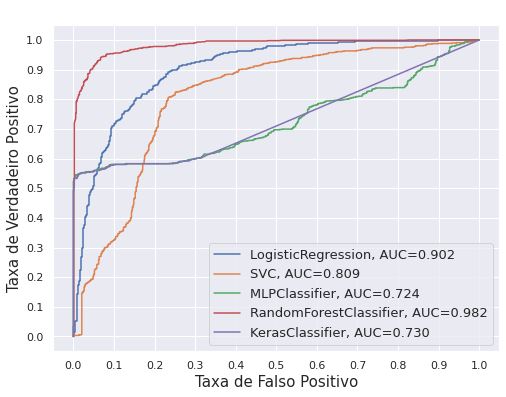

In [145]:
fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
    
# plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Taxa de Falso Positivo", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Taxa de Verdadeiro Positivo", fontsize=15)

plt.title(' ', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()